In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import csv
import os
import sys

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dir = './data'

student_log_paths = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.startswith('student_log')]
training_label_path = os.path.join(data_dir, 'training_label.csv')
validation_test_label = os.path.join(data_dir, 'validation_test_label.csv')

dfs = []
for path in student_log_paths:
    temp = pd.read_csv(path)
    dfs.append(temp)
student_df = pd.concat(dfs)

training_label_df = pd.read_csv(training_label_path)
training_label_df.drop_duplicates(inplace=True)
validation_test_label_df = pd.read_csv(validation_test_label)

/Users/ckyeungac/anaconda/envs/dlenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (74,75) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print("student_df.shape:", student_df.shape) 
print("training_label_df.shape:", training_label_df.shape)
print("validation_test_label_df.shape:", validation_test_label_df.shape)

student_df.shape: (942816, 77)
training_label_df.shape: (467, 5)
validation_test_label_df.shape: (172, 4)


In [4]:
len(set(training_label_df.ITEST_id).intersection(set(validation_test_label_df.ITEST_id)))

48

In [5]:
student_df.head()

,AveCarelessness,AveCorrect,AveKnow,AveResBored,AveResConf,AveResEngcon,AveResFrust,AveResGaming,AveResOfftask,ITEST_id,...,timeOver80,timeSinceSkill,timeTaken,totalFrAttempted,totalFrPastWrongCount,totalFrPercentPastWrong,totalFrSkillOpportunities,totalFrSkillOpportunitiesByScaffolding,totalFrTimeOnSkill,totalTimeByPercentCorrectForskill
0,0.327994,0.613402,0.592481,0.269116,0.115623,0.644795,0.077154,0.003914,0.269938,6173,...,1,0.0,143.0,0,0,0.0,0,0.0,0.0,143.0
1,0.327994,0.613402,0.592481,0.269116,0.115623,0.644795,0.077154,0.003914,0.269938,6173,...,1,0.0,82.0,1,0,0.0,0,0.0,0.0,82.0
2,0.327994,0.613402,0.592481,0.269116,0.115623,0.644795,0.077154,0.003914,0.269938,6173,...,1,0.0,104.0,2,0,0.0,0,0.0,0.0,104.0
3,0.327994,0.613402,0.592481,0.269116,0.115623,0.644795,0.077154,0.003914,0.269938,6173,...,1,0.0,106.0,3,0,0.0,0,0.0,0.0,106.0
4,0.327994,0.613402,0.592481,0.269116,0.115623,0.644795,0.077154,0.003914,0.269938,6173,...,0,0.0,39.0,4,0,0.0,0,0.0,0.0,0.0


In [6]:
student_df.columns

Index(['AveCarelessness', 'AveCorrect', 'AveKnow', 'AveResBored', 'AveResConf',
       'AveResEngcon', 'AveResFrust', 'AveResGaming', 'AveResOfftask',
       'ITEST_id', 'Ln', 'Ln-1', 'NumActions', 'Prev5count', 'RES_BORED',
       'RES_CONCENTRATING', 'RES_CONFUSED', 'RES_FRUSTRATED', 'RES_GAMING',
       'RES_OFFTASK', 'SY ASSISTments Usage', 'actionId', 'assignmentId',
       'assistmentId', 'attemptCount', 'bottomHint', 'confidence(BORED)',
       'confidence(CONCENTRATING)', 'confidence(CONFUSED)',
       'confidence(FRUSTRATED)', 'confidence(GAMING)', 'confidence(OFF TASK)',
       'consecutiveErrorsInRow', 'correct', 'endTime',
       'endsWithAutoScaffolding', 'endsWithScaffolding', 'frIsHelpRequest',
       'frIsHelpRequestScaffolding', 'frPast5HelpRequest', 'frPast5WrongCount',
       'frPast8HelpRequest', 'frPast8WrongCount', 'frTimeTakenOnScaffolding',
       'frTotalSkillOpportunitiesScaffolding', 'frWorkingInSchool',
       'helpAccessUnder2Sec', 'hint', 'hintCount', 'hin

In [7]:
len(student_df.ITEST_id.unique())

1709

In [8]:
skill = student_df.skill.unique()
skill_id = range(len(skill))
skill2id = dict(zip(skill, skill_id))
id2sill = dict(zip(skill_id, skill))

In [9]:
len(skill)

102

In [10]:
student_specific_columns = ["AveKnow",
                            "AveCarelessness",
                            "AveCorrect",
                            "NumActions",
                            "AveResBored",
                            "AveResEngcon",
                            "AveResConf",
                            "AveResFrust",
                            "AveResOfftask",
                            "AveResGaming"]

In [11]:
required_cols = ['ITEST_id'] + student_specific_columns
student_specific_df = student_df[required_cols].drop_duplicates()

In [12]:
training_label_df.head()

,ITEST_id,SchoolId,AveCorrect,MCAS,isSTEM
0,9,2,0.438492,32,1
1,27,1,0.348837,21,0
2,33,2,0.686391,52,0
3,35,2,0.379658,34,0
4,37,3,0.305785,-999,0


In [13]:
# combined_df = pd.merge(left=training_label_df, right=student_specific_df, how='left', left_on='ITEST_id', right_on='ITEST_id')
combined_df_train = training_label_df.merge(student_specific_df, left_on='ITEST_id', right_on='ITEST_id', how='left')
combined_df_train['AveCorrect'] = combined_df_train['AveCorrect_x']
del combined_df_train['AveCorrect_x']
del combined_df_train['AveCorrect_y']
X = combined_df_train[student_specific_columns].values
y = combined_df_train['isSTEM'].values

In [14]:
combined_df_test = pd.merge(left=validation_test_label_df, right=student_specific_df, how='left')
X_target = combined_df_test[student_specific_columns].values

In [15]:
X.shape

(467, 10)

In [16]:
combined_df_train.head()

,ITEST_id,SchoolId,MCAS,isSTEM,AveKnow,AveCarelessness,NumActions,AveResBored,AveResEngcon,AveResConf,AveResFrust,AveResOfftask,AveResGaming,AveCorrect
0,9,2,32,1,0.185138,0.099734,504,0.277149,0.644744,0.098078,0.162771,0.213378,0.005554,0.438492
1,27,1,21,0,0.142031,0.069297,129,0.330226,0.551367,0.122658,0.095420,0.348090,0.036900,0.348837
2,33,2,52,0,0.459813,0.202787,169,0.260426,0.650769,0.059971,0.061834,0.296286,0.010954,0.686391
3,35,2,34,0,0.255164,0.158848,993,0.222796,0.650079,0.069987,0.164347,0.153147,0.236800,0.379658
4,37,3,-999,0,0.071909,0.046183,121,0.326384,0.653445,0.125325,0.094714,0.451467,0.016241,0.305785


# experiment

In [17]:
def prepare_dataset(use_static_only=False, use_dktp=True):
    static_columns = student_specific_columns = ["AveKnow",
                                "AveCarelessness",
                                "AveCorrect",
                                "NumActions",
                                "AveResBored",
                                "AveResEngcon",
                                "AveResConf",
                                "AveResFrust",
                                "AveResOfftask",
                                "AveResGaming"]

    kt_columns = ['kt_{}'.format(i) for i in range(102)]


    # prepare features
    features_cols = []
    target_models = []
    if use_static_only:
        features_cols = static_columns
        train_df = training_label_df.merge(student_specific_df, left_on='ITEST_id', right_on='ITEST_id', how='left')
        test_df = validation_test_label_df.merge(student_specific_df, left_on='ITEST_id', right_on='ITEST_id', how='left')
    else:
        features_cols = static_columns + kt_columns
        if use_dktp:
            students_knowledge_states_path = './data/students_knowledge_states_dktp.csv'
        else:
            students_knowledge_states_path = './data/students_knowledge_states_dkt.csv'

        students_dk_df = pd.read_csv(students_knowledge_states_path)
        combined_df = pd.merge(left=student_specific_df, right=students_dk_df, how='left')
        train_df = training_label_df.merge(combined_df, left_on='ITEST_id', right_on='ITEST_id', how='left')
        test_df = validation_test_label_df.merge(combined_df, left_on='ITEST_id', right_on='ITEST_id', how='left')

    # remove duplicated features
    train_df['AveCorrect'] = train_df['AveCorrect_x']
    del train_df['AveCorrect_x']
    del train_df['AveCorrect_y']
    test_df['AveCorrect'] = test_df['AveCorrect_x']
    del test_df['AveCorrect_x']
    del test_df['AveCorrect_y']

    # prepare dataset
    X_tr = train_df[features_cols]
    y_tr = train_df['isSTEM']
    X_te = test_df[features_cols] 
    
    # rename the columns to skill name
    df_columns = X_tr.columns.values
    for i in range(102):
        ix = np.where(df_columns == 'kt_{}'.format(i))
        df_columns[ix] = id2sill[i]
    X_tr.columns = df_columns
    X_te.columns = df_columns
    
    return X_tr, y_tr, X_te

In [18]:
X_tr, y_tr, X_te = prepare_dataset()

In [19]:
X_tr.head()

,AveKnow,AveCarelessness,AveCorrect,NumActions,AveResBored,AveResEngcon,AveResConf,AveResFrust,AveResOfftask,AveResGaming,...,multiplying-positive-negative-numbers,application: compare points,application: multi-column subtraction,application: simple multiplication,application: compare expressions,application: order of operations,application: multi-column addition,application: read points,application: find slope in graph,application: finding percentage of a number
0,0.185138,0.099734,0.438492,504,0.277149,0.644744,0.098078,0.162771,0.213378,0.005554,...,0.662643,0.859212,0.734459,0.847522,0.734016,0.821079,0.758121,0.804664,0.880314,0.177373
1,0.142031,0.069297,0.348837,129,0.330226,0.551367,0.122658,0.095420,0.348090,0.036900,...,0.653775,0.859102,0.734639,0.847371,0.734381,0.821322,0.758001,0.804243,0.880286,0.177019
2,0.459813,0.202787,0.686391,169,0.260426,0.650769,0.059971,0.061834,0.296286,0.010954,...,0.648593,0.859321,0.734540,0.847421,0.734533,0.821168,0.758505,0.804610,0.880168,0.176693
3,0.255164,0.158848,0.379658,993,0.222796,0.650079,0.069987,0.164347,0.153147,0.236800,...,0.645798,0.858873,0.734250,0.847353,0.734647,0.821344,0.757768,0.804096,0.880175,0.177116
4,0.071909,0.046183,0.305785,121,0.326384,0.653445,0.125325,0.094714,0.451467,0.016241,...,0.647155,0.858930,0.734310,0.847313,0.734611,0.821302,0.758223,0.804268,0.880225,0.176869


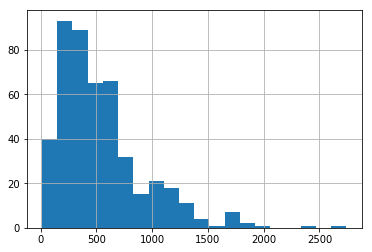

In [20]:
X_tr['NumActions'].hist(grid=True, bins=20)

In [21]:
min(X_tr['NumActions'])

12

# Correlation

In [52]:
use_static_only = True
use_dktp = False

X_tr, y_tr, X_te = prepare_dataset(use_static_only, use_dktp)
X_tr.head()
static_df = X_tr

In [22]:
use_static_only = False
use_dktp = True

X_tr, y_tr, X_te = prepare_dataset(use_static_only, use_dktp)
kt_columns = list(skill2id.keys())
columns = kt_columns + ['isSTEM']
dktp_df = X_tr[kt_columns]

In [23]:
dktp_df.head()

,least-common-multiple,pattern-finding,algebraic-manipulation,circle-graph,probability,noskill,triangle-inequality,area,properties-of-geometric-figures,area-of-circle,...,multiplying-positive-negative-numbers,application: compare points,application: multi-column subtraction,application: simple multiplication,application: compare expressions,application: order of operations,application: multi-column addition,application: read points,application: find slope in graph,application: finding percentage of a number
0,0.004930,0.856057,0.559009,0.693791,0.779800,0.765946,0.607152,0.611766,0.672387,0.564902,...,0.662643,0.859212,0.734459,0.847522,0.734016,0.821079,0.758121,0.804664,0.880314,0.177373
1,0.009653,0.522395,0.451000,0.567070,0.573825,0.628102,0.560525,0.456414,0.526662,0.443715,...,0.653775,0.859102,0.734639,0.847371,0.734381,0.821322,0.758001,0.804243,0.880286,0.177019
2,0.003247,0.319282,0.180944,0.407559,0.391641,0.582065,0.488964,0.140198,0.200504,0.359712,...,0.648593,0.859321,0.734540,0.847421,0.734533,0.821168,0.758505,0.804610,0.880168,0.176693
3,0.004197,0.482195,0.321468,0.447824,0.443841,0.508721,0.497354,0.261760,0.360583,0.357766,...,0.645798,0.858873,0.734250,0.847353,0.734647,0.821344,0.757768,0.804096,0.880175,0.177116
4,0.001148,0.254887,0.220256,0.332173,0.291264,0.287870,0.456726,0.094413,0.154544,0.302894,...,0.647155,0.858930,0.734310,0.847313,0.734611,0.821302,0.758223,0.804268,0.880225,0.176869


In [24]:
use_static_only = False
use_dktp = False

X_tr, y_tr, X_te = prepare_dataset(use_static_only, use_dktp)
kt_columns = list(skill2id.keys())
columns = kt_columns + ['isSTEM']
dkt_df = X_tr[kt_columns]

# Dimensionality Reduction
+ PCA
+ LDA

## PCA

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [26]:
pca = PCA(n_components=3)
pca.fit(dktp_df)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [27]:
pca.explained_variance_ratio_

array([0.87966655, 0.0204417 , 0.01461372])

In [28]:
sum(pca.explained_variance_ratio_)

0.9147219652097682

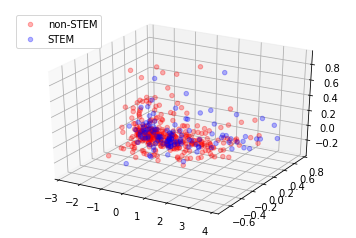

In [29]:
x = dktp_df
y = y_tr.values
x_pca = pca.transform(x)

cdict = {0: 'red', 1: 'blue'}
ldict = {0: 'non-STEM', 1: 'STEM'}

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for g in np.unique(y):
    ix = np.where(y == g)
    xs = x_pca[ix, 0]
    ys = x_pca[ix, 1]
    zs = x_pca[ix, 2]
    ax.scatter3D(xs, ys, zs, c=cdict[g], alpha=0.3, label=ldict[g])

ax.legend(loc='upper left')
# plt.title('3D scatter plot of knowledge state obtained in DKT+\n after applying PCA dimentionality reduction')
plt.savefig('knowledge_state_pca.pdf', bbox_inches='tight')

In [30]:
pca = PCA(n_components=1)
pca.fit(dktp_df)
x_pca = pca.transform(dktp_df)

/Users/ckyeungac/anaconda/envs/dlenv/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


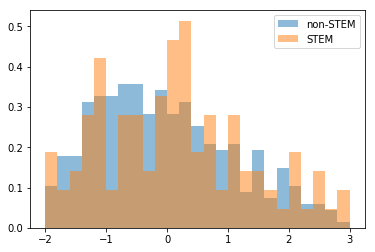

In [31]:
# non-stem
ix = np.where(y_tr.values == 0)
x_nonstem = x_pca[ix]

# stem
ix = np.where(y_tr.values == 1)
x_stem = x_pca[ix]

max_val = np.floor(x_pca.max())
min_val = np.ceil(x_pca.min())

bins = np.linspace(min_val, max_val, (max_val - min_val)*5+1)

# plot histogram
plt.hist(x_nonstem, bins, density=True, alpha=0.5, label='non-STEM')
plt.hist(x_stem, bins, density=True, alpha=0.5, label='STEM')
plt.legend(loc='upper right')
plt.show()

## LDA + student profile

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [53]:
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(static_df.values, y_tr.values)

LinearDiscriminantAnalysis(n_components=1, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [54]:
lda.explained_variance_ratio_

array([1.])

In [56]:
x_lda = lda.transform(static_df.values)

In [57]:
x_lda.min()

-2.388658608124108

In [58]:
x_lda.max()

5.171533057542212

/Users/ckyeungac/anaconda/envs/dlenv/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


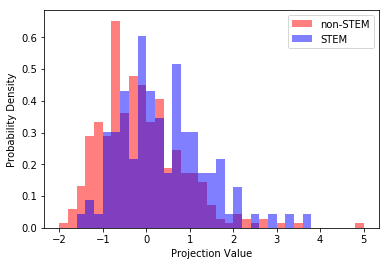

In [62]:
# non-stem
ix = np.where(y_tr.values == 0)
x_nonstem = x_lda[ix]

# stem
ix = np.where(y_tr.values == 1)
x_stem = x_lda[ix]

max_val = np.floor(x_lda.max())
min_val = np.ceil(x_lda.min())

bins = np.linspace(min_val, max_val, (max_val - min_val)*5 + 1)

# plot histogram
plt.hist(x_nonstem, bins, density=True, alpha=0.5, label='non-STEM', color='red')
plt.hist(x_stem, bins, density=True, alpha=0.5, label='STEM', color='blue')
plt.legend(loc='upper right')
# plt.title('Histogram of knowledge state obtained in DKT+\n after applying LDA dimentionality reduction')

plt.xlabel('Projection Value')
plt.ylabel('Probability Density')
plt.savefig('static_only_lda.pdf', bbox_inches='tight')

## LDA + DKT

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [76]:
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(dkt_df.values, y_tr.values)

LinearDiscriminantAnalysis(n_components=1, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [77]:
lda.explained_variance_ratio_

array([1.])

In [78]:
x_lda = lda.transform(dkt_df.values)

In [79]:
x_lda.min()

-2.9827749664481615

In [80]:
x_lda.max()

3.8568911710188876

/Users/ckyeungac/anaconda/envs/dlenv/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


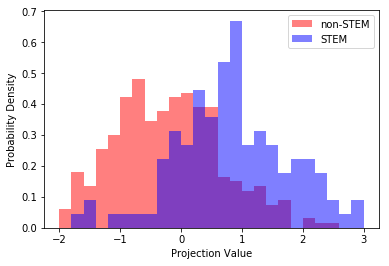

In [81]:
# non-stem
ix = np.where(y_tr.values == 0)
x_nonstem = x_lda[ix]

# stem
ix = np.where(y_tr.values == 1)
x_stem = x_lda[ix]

max_val = np.floor(x_lda.max())
min_val = np.ceil(x_lda.min())

bins = np.linspace(min_val, max_val, (max_val - min_val)*5 + 1)

# plot histogram
plt.hist(x_nonstem, bins, density=True, alpha=0.5, label='non-STEM', color='red')
plt.hist(x_stem, bins, density=True, alpha=0.5, label='STEM', color='blue')
plt.legend(loc='upper right')
# plt.title('Histogram of knowledge state obtained in DKT+\n after applying LDA dimentionality reduction')

plt.xlabel('Projection Value')
plt.ylabel('Probability Density')
plt.savefig('dkt_knowledge_state_lda.pdf', bbox_inches='tight')

## LDA + DKT+

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [82]:
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(dktp_df.values, y_tr.values)

LinearDiscriminantAnalysis(n_components=1, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [83]:
lda.explained_variance_ratio_

array([1.])

In [84]:
x_lda = lda.transform(dktp_df.values)

In [85]:
x_lda.min()

-2.7512604275583747

In [86]:
x_lda.max()

5.351403325810922

/Users/ckyeungac/anaconda/envs/dlenv/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


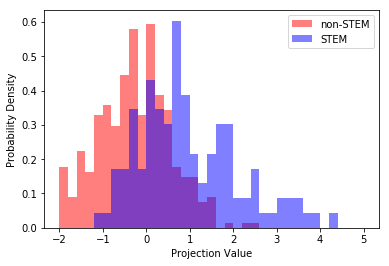

In [89]:
# non-stem
ix = np.where(y_tr.values == 0)
x_nonstem = x_lda[ix]

# stem
ix = np.where(y_tr.values == 1)
x_stem = x_lda[ix]

max_val = np.floor(x_lda.max())
min_val = np.ceil(x_lda.min())

bins = np.linspace(min_val, max_val, (max_val - min_val)*5 + 1)

# plot histogram
plt.hist(x_nonstem, bins, density=True, alpha=0.5, label='non-STEM', color='red')
plt.hist(x_stem, bins, density=True, alpha=0.5, label='STEM', color='blue')
plt.legend(loc='upper right')
# plt.title('Histogram of knowledge state obtained in DKT+\n after applying LDA dimentionality reduction')

plt.xlabel('Projection Value')
plt.ylabel('Probability Density')
plt.savefig('dktp_knowledge_state_lda.pdf', bbox_inches='tight')

In [88]:
import matplotlib
matplotlib.__version__

'2.1.2'

In [40]:
x_lda.shape

(467, 1)

In [41]:
y.shape

(467,)

In [42]:
stem = x_lda
stem[stem > 0.5] = 1
stem[stem < 0.5] = 0